# Animate
Using `stackview.animate` you can visualize timelapse data in Jupyter notebooks. The videos are stored to disk in .gif format. This allows rendering them in github repositories. However, make sure that the files are not too big and consider sub-sampling.

In [1]:
from skimage.io import imread
from skimage.filters import gaussian
import numpy as np

import stackview
stackview.__version__

'0.7.10'

In [2]:
timelapse = imread("data/CalibZAPWfixed_000154_max.tif")[:20,::2,::2]
timelapse.shape

(20, 118, 195)


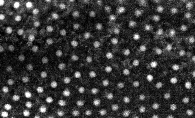

In [3]:
stackview.animate(timelapse)

You can also modify the speed of the animation.


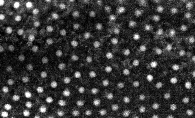

In [4]:
stackview.animate(timelapse, frame_delay_ms=50)

In [5]:
blobs = imread("data/blobs.tif")
blobs.shape

(254, 256)


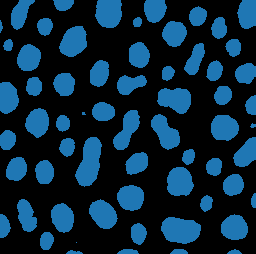

In [6]:
stackview.animate_curtain(blobs, blobs > 128)


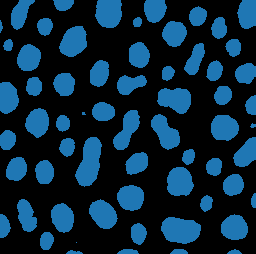

In [7]:
stackview.animate_curtain(blobs, blobs > 128, zoom_factor=2)

## RGB image support
We can also do this using RGB images.

In [8]:
hela = imread("data/hela-cells.tif")[::2, ::2]
hela.shape

(256, 336, 3)

In [9]:
hela = hela / hela.max() * 255

In [10]:
hela_images = np.asarray([gaussian(hela, sigma=s, preserve_range=True, channel_axis=2) for s in list(range(0, 15)) + list(range(15, 0, -1))])
hela_images.shape

(30, 256, 336, 3)


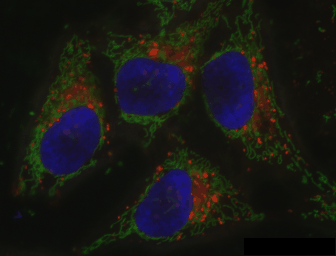

In [11]:
stackview.animate(hela_images)

## Trouble shooting: Overflowing intensities
In case the input image is not 8-bit integers or with pixel intensities in small or large ranges, consider normalizing the images.

If the intensity in the image exceeds the range 0-255, images may show borders where the intensity is overflowing.

c:\structure\code\stackview\stackview\_animate.py:41: UserWarning: The timelapse has an intensity range exceeding 0..255. Consider normalizing it to the range between 0 and 255.
  warnings.warn("The timelapse has an intensity range exceeding 0..255. Consider normalizing it to the range between 0 and 255.")



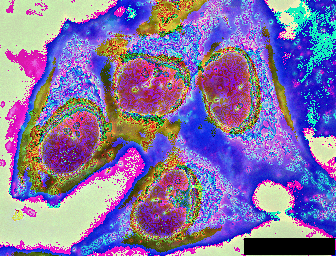

In [12]:
hela_image2 = imread("data/hela-cells.tif")[::2, ::2]

hela_images2 = np.asarray([gaussian(hela_image2, sigma=s, preserve_range=True, channel_axis=2) for s in range(0, 10, 5)])

stackview.animate(hela_images2, frame_delay_ms=1000)

In [13]:
hela_images2.min(), hela_images2.max()

(0.0, 4095.0)

Also in this case, normalizing the image intensity to the range 0-255 helps.


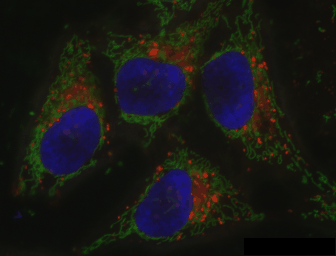

In [14]:
hela_images2_ = hela_images2 / hela_images2.max() * 255

stackview.animate(hela_images2_, frame_delay_ms=1000)